# LFP power center of mass
### Compute center of mass in power in theta band throughout the trial

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from scipy.io import loadmat
from scipy import ndimage
from scipy import stats 

import mne
from mne.time_frequency import tfr_array_multitaper, psd_array_multitaper
import pickle

from statsmodels.formula.api import ols, mixedlm
import statsmodels.api as sm

In [3]:
## Load study related info
with open('../Results/study_info.pickle', 'rb') as handle:
    study_info = pickle.load(handle,encoding='latin1')
    

density        = study_info['density'] 
speed          = study_info['speed'] 
dd             = study_info['dd'] ## Number of sensory cues (density)
dur            = study_info['dur'] ## Trial duration (sec)
K_i_idx        = study_info['K_i_idx']
K_i            = study_info['K_i']
uni            = study_info['uni']
t_dur          = study_info['t_dur']
t_dd           = study_info['t_dd']
sessions       = study_info['sessions'] 
ttl_idx        = study_info['ttl_idx']
hpc_electrodes = study_info['hpc_electrodes']
fs = study_info['fs']



## Load trial markers for each session
with open('../Results/trials_markers.pickle', 'rb') as handle:
    trials_markers = pickle.load(handle,encoding='latin1')

In [4]:
freqs = np.logspace(*np.log10([4, 12]), num=30) # define frequencies of interest (log-spaced)
n_cycles = freqs / 2.  # different number of cycle per frequency
output = 'power'
wind_size = 100


trial_begin           = 0
trial_end             = 1500
filter_data_low_freq  = 4
filter_data_high_freq = 28
smooth_psd_sz         = 15
smooth_psd_sigma      = 2

## Trial type
tmp_density = np.tile( np.repeat( np.arange(3), 3 ),3)
tmp_speed = np.tile( np.arange(3), 9 )
tmp_dur = [ 18.1, 13.5, 11]
tmp_dd = [50,100,150]

log_com_freq = []
for sub in range(len(sessions)):


    lfp = loadmat('../Data/'+sessions[sub]+'.mat')
    lfp = lfp['ourData']
    idx_trials = trials_markers[sessions[sub]]

    
    cc = hpc_electrodes[sub][0]


    all_pow_com = []
    for trial in range(len(idx_trials)):

        tmp_lfp = lfp[cc][ idx_trials[trial] + trial_begin : idx_trials[trial] + trial_end ]
        tmp_lfp_bbp = mne.filter.filter_data(  np.float64(tmp_lfp) , fs, filter_data_low_freq, filter_data_high_freq)

        power = mne.time_frequency.tfr_array_morlet( [[tmp_lfp_bbp]],  fs, freqs=freqs, output=output )
        power = power[0,0]


        pow_com = []        
        for w in range(power.shape[1] - wind_size):
            pow_com.append( ndimage.measurements.center_of_mass( power[:,w:w+wind_size] )[0] )
            
        all_pow_com.append( [cc, tmp_density[trial], tmp_speed[trial], tmp_dd[tmp_density[trial]]/tmp_dur[tmp_speed[trial]] , pow_com] )
    
    log_com_freq.append(all_pow_com)

Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 

h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen

Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 

h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen

Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected
Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 

Setting up band-pass filter from 4 - 28 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 7.0 Hz
Filter length of 845 samples (1.650 sec) selected


Text(0.5, 0, 'Time (sec)')

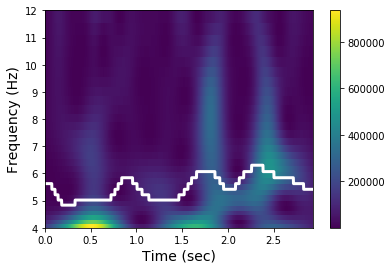

In [131]:
sub = 0

lfp = loadmat('../Data/'+sessions[sub]+'.mat')
lfp = lfp['ourData']
idx_trials = trials_markers[sessions[sub]]


cc = hpc_electrodes[sub][0]

trial = 10

tmp_lfp = lfp[cc][ idx_trials[trial] + trial_begin : idx_trials[trial] + trial_end ]
tmp_lfp_bbp = mne.filter.filter_data(  np.float64(tmp_lfp) , fs, filter_data_low_freq, filter_data_high_freq)

power = mne.time_frequency.tfr_array_morlet( [[tmp_lfp_bbp]],  fs, freqs=freqs, output=output  )
power = power[0,0]


times = np.linspace(0, power.shape[1]/fs, power.shape[1])

plt.pcolormesh(times,freqs, power)
plt.colorbar()

pow_com = []        
for w in range(power.shape[1] ):
    pow_com.append( ndimage.measurements.center_of_mass( power[:,w:w+wind_size] )[0] )

pow_com = np.array(pow_com)

plt.plot(times, freqs[pow_com.astype(int)] , color='w', linewidth=3)


plt.ylabel('Frequency (Hz)', fontsize=14)
plt.xlabel('Time (sec)', fontsize=14)


In [96]:
frq_com = []
for ss in range(8):
    for tt in range(len(log_com_freq[sub])):
        
        tmp = np.array(log_com_freq[ss][tt][4])
        num_bins = 30
        pha_hist = np.histogram(freqs[tmp.astype(int)], bins=int(num_bins))
        phase_dist = pha_hist[0] + 1
        n_pevents = float(np.sum(phase_dist))
        ppp = -1 * np.sum((phase_dist/n_pevents) * np.log((phase_dist/n_pevents)))
        K_L = (np.log(num_bins) - ppp) / np.log(num_bins)
        
        frq_com.append( [ sub, log_com_freq[ss][tt][1] , log_com_freq[ss][tt][2] , log_com_freq[ss][tt][3] , np.mean(log_com_freq[ss][tt][4]), np.std(log_com_freq[ss][tt][4]), K_L ] )
        
frq_com = np.array(frq_com)
frq_com = pd.DataFrame(frq_com, columns=['sub','density','speed','cuesec','freq_com_mean','freq_com_std','freq_com_KL'] )



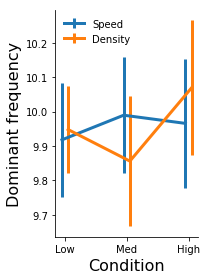

In [132]:
fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(4)
fig.set_figwidth(3)

var_of_interst = 'freq_com_mean'


mmd = frq_com.groupby(['density']).mean()[var_of_interst]
mms = frq_com.groupby(['speed']).mean()[var_of_interst]

ssd = frq_com.groupby(['density']).sem()[var_of_interst]
sss = frq_com.groupby(['speed']).sem()[var_of_interst]

plt.errorbar(  np.arange(3)-0.05, mms, yerr=sss, label='Speed', linewidth=3 )
plt.errorbar(  np.arange(3)+0.05, mmd, yerr=ssd, label='Density', linewidth=3  )


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.sca(ax)
plt.legend( frameon=False, loc='upper left')

plt.xlabel('Condition', fontsize=16)
plt.ylabel('Dominant frequency', fontsize=16)

plt.xticks(range(3), ['Low','Med','High'])

plt.tight_layout()
# plt.savefig('../Figures/theta_dominant_freq_both.pdf')

Pearson:  (0.03367916742113113, 0.6225438900549529)
                    sum_sq     df         F    PR(>F)
freq_com_mean     2.807061    1.0  0.243013  0.622544
Residual       2471.930235  214.0       NaN       NaN


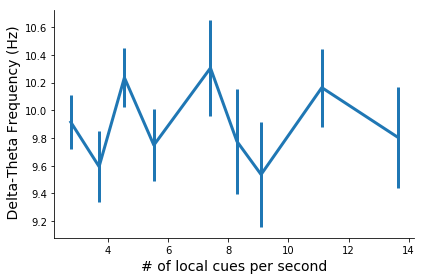

In [133]:
mmcs = frq_com.groupby(['cuesec']).median()[var_of_interst]
sscs = frq_com.groupby(['cuesec']).sem()[var_of_interst]


fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(4)
fig.set_figwidth(6)


ax.errorbar( uni, mmcs, yerr=sscs, linewidth=3 )
# sns.violinplot(data=log_wel_all.groupby(['cuesec']),  palette="Set3", bw=1.2, cut=2, linewidth=1 )


fig.patch.set_facecolor('xkcd:white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.sca(ax)

plt.ylabel(' Delta-Theta Frequency (Hz)', fontsize=14)
plt.xlabel('# of local cues per second', fontsize=14)

# plt.ylim(8,12)

plt.tight_layout()



print( 'Pearson: ',  stats.pearsonr(frq_com.cuesec, frq_com[var_of_interst] ))

cw_lm=ols('cuesec ~ ' + var_of_interst , data=frq_com).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

# plt.savefig('../Figures/theta_dominant_freq_cues_per_sec.pdf')

In [134]:
real_control = 'control'


all_control = []


for iix in range(100):

    save_freq_in_cs =[]
    for cs in frq_com.cuesec.unique():
        idx = np.where( frq_com.cuesec==cs )[0]
        if real_control == 'control':
            idx = np.random.randint( 0, frq_com.shape[0], idx.size  )
        save_freq_in_cs.append( frq_com[var_of_interst][idx] )





    if real_control == 'real':
        rmm,rss = [],[]
        for ii in range(len(save_freq_in_cs)):    
            rmm.append(np.mean(save_freq_in_cs[ii]))
            rss.append(stats.sem(save_freq_in_cs[ii]))

    if real_control == 'control':
        control_mm,control_ss = [],[]
        for ii in range(len(save_freq_in_cs)):    
            control_mm.append(np.mean(save_freq_in_cs[ii]))
            control_ss.append(stats.sem(save_freq_in_cs[ii]))

        all_control.append(control_mm)
        
all_control = np.array(all_control)




control_m = np.mean(all_control,axis=0)
control_s = stats.sem(all_control,axis=0)


Pearson:  (0.03367916742113113, 0.6225438900549529)
                    sum_sq     df         F    PR(>F)
freq_com_mean     2.807061    1.0  0.243013  0.622544
Residual       2471.930235  214.0       NaN       NaN


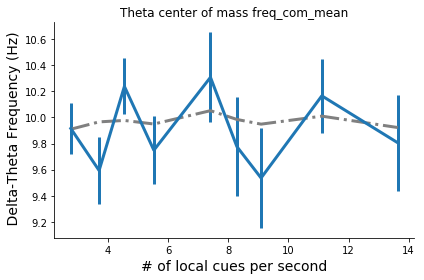

In [135]:
mmcs = frq_com.groupby(['cuesec']).median()[var_of_interst]
sscs = frq_com.groupby(['cuesec']).sem()[var_of_interst]


fig = plt.figure()
ax = fig.add_subplot(111)

fig.set_figheight(4)
fig.set_figwidth(6)



plt.plot(uni, control_m, linestyle='-.', color='grey', linewidth=3 )

ax.errorbar( uni, mmcs, yerr=sscs, linewidth=3  )
# plt.plot( uni, mmcs)
# plt.fill_between( uni, mmcs-sscs, mmcs+sscs,alpha=0.2 )


fig.patch.set_facecolor('xkcd:white')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


plt.sca(ax)

plt.ylabel(' Delta-Theta Frequency (Hz)', fontsize=14)
plt.xlabel('# of local cues per second', fontsize=14)



plt.title('Theta center of mass ' + var_of_interst)

# plt.ylim(9,11)

plt.tight_layout()



print( 'Pearson: ',  stats.pearsonr(frq_com.cuesec, frq_com[var_of_interst] ))

cw_lm=ols('cuesec ~ ' + var_of_interst , data=frq_com).fit() #Specify C for Categorical
print(sm.stats.anova_lm(cw_lm, typ=2))

# plt.savefig('../Figures/theta_dominant_freq_cues_per_sec.pdf')